In [93]:
# Milan Kovacs - 21308128, Caoimhe Cahill - 21331308
# The code runs to execution

In [94]:
# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from tensorflow import keras


In [95]:
# Loading data from csv and printing it
dataset_path = 'phones.csv'
data = pd.read_csv(dataset_path)
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

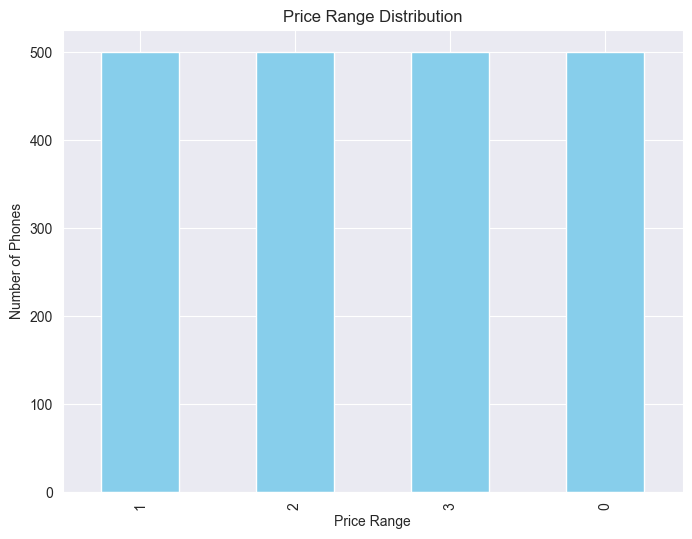

In [96]:

#Bar Chart graph shows there's no imbalance with the predication value in the dataset - no bias
# Count occurrences of each price range
price_range_counts = data['price_range'].value_counts()
plt.figure(figsize=(8, 6))
price_range_counts.plot(kind='bar', color='skyblue')
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Number of Phones')
plt.show()

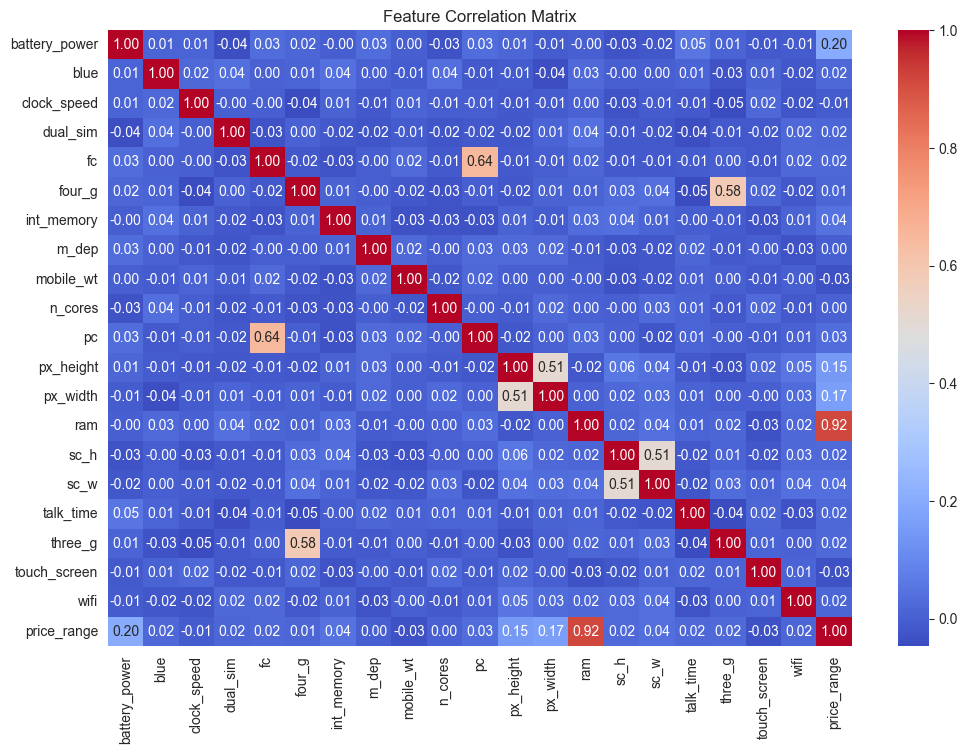

In [97]:
# Analyze feature correlations
"""
There is of features so we will use this correlation to decide what features to use 
- selecting features that correlate well with your target variable
- reduce noise
"""
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

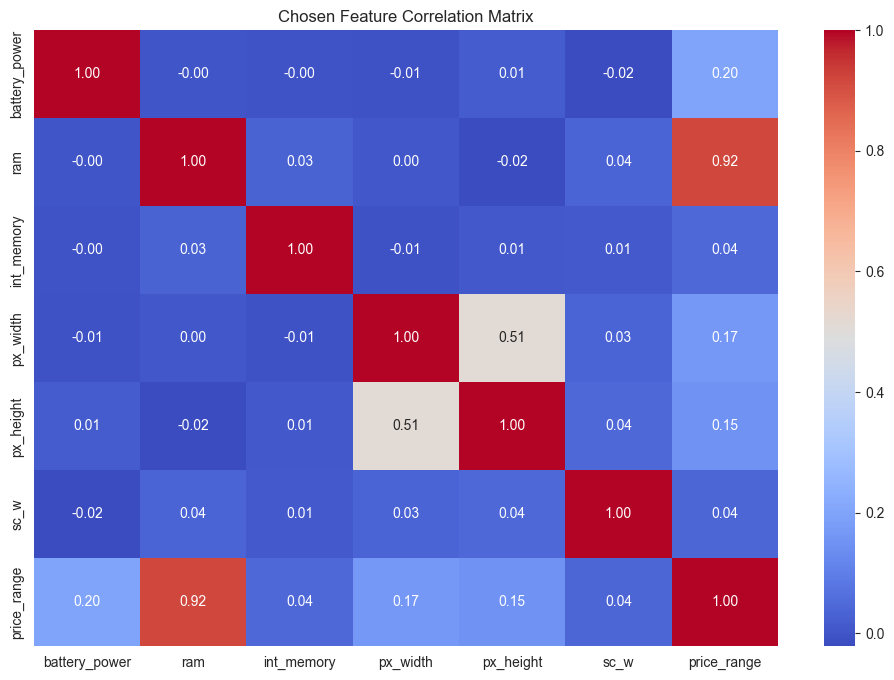

In [107]:
key_features = data[['battery_power', 'ram', 'int_memory', 'px_width', 'px_height', 'sc_w', 'price_range']]

corr_matrix = key_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Chosen Feature Correlation Matrix')
plt.show()

In [98]:
#Seperate features and target(prediction variable)
X = data[['battery_power', 'ram', 'int_memory', 'px_width', 'px_height', 'sc_w']]#Features
Y = data['price_range'] #Target(prediction variable)

#Split data in training set and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a MinMaxScaler for normalisation
scaler = MinMaxScaler()

# Fit Scaler on sets
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Print shapes and the first few rows of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (1600, 6)
x_test shape: (400, 6)
y_train shape: (1600,)
y_test shape: (400,)


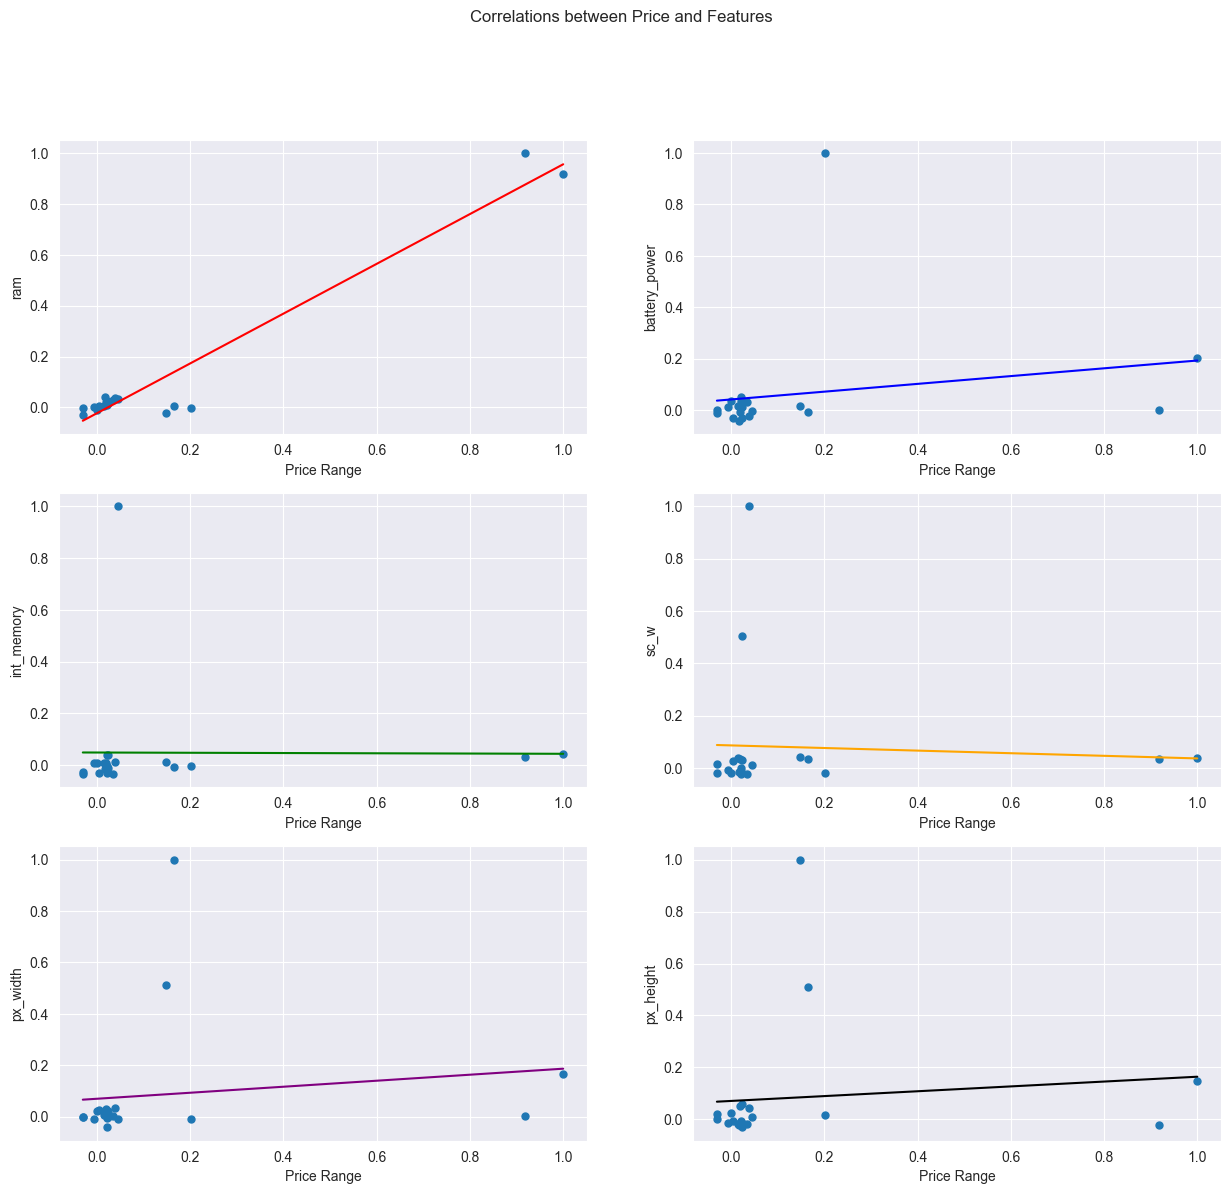

In [99]:
# Correlation between the prices and the features
# https://www.geeksforgeeks.org/plotting-correlation-matrix-using-python/

fig, axis = plt.subplots(3,2)
fig.suptitle('Correlations between Price and Features')
fig.set_figheight(13)
fig.set_figwidth(15)

price =         corr_matrix['price_range']

ram =           corr_matrix['ram']
batter_power =  corr_matrix['battery_power']
int_memory =    corr_matrix['int_memory']
px_width =      corr_matrix['px_width']
px_height =     corr_matrix['px_height']
sc_w =          corr_matrix['sc_w']

data_sets = [
    ram,
    batter_power,
    int_memory,
    sc_w,
    px_width,
    px_height,
]

colours = ['red', 'blue', 'green', 'orange', 'purple', 'black']
marker_size = 25
marker_symbol = 'o'

i = 0
for row in range(3):
    for col in range(2):
        data_being_plotted = data_sets[i]
        plot = axis[row, col]
        plot.scatter(price, data_being_plotted, marker=marker_symbol, s=marker_size)
        plot.plot(np.unique(price), np.poly1d(np.polyfit(price, data_being_plotted, 1))
         (np.unique(price)), color=colours[i])
        plot.set(xlabel='Price Range', ylabel=f'{data_being_plotted.name}')
        i += 1

plt.show()



In [100]:
def plot_history(mdl_training):
    accuracy = [result * 100 for result in mdl_training.history['accuracy']]
    validation_accuracy = [result * 100 for result in mdl_training.history['val_accuracy']]
    loss = mdl_training.history['loss']
    validation_loss = mdl_training.history['val_loss']
    
    plt.title('model accuracy')
    plt.plot(accuracy, label='accuracy as %')
    plt.plot(validation_accuracy, label='validation accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training set', 'validation set'], loc='upper left')
    plt.figure(figsize=(100, 100))
    
    plt.show()
    
    plt.title('loss function')
    plt.plot(loss, label='loss')
    plt.plot(validation_loss, label='loss value')
    plt.ylabel('validation loss')
    plt.xlabel('epoch')
    plt.legend(['training set', 'validation set'], loc='upper right')
    plt.figure(figsize=(100, 100))
    
    plt.show()

class ClassificationMultiLayerPerceptron:    
    def __init__(self, 
                 LAYERS = [6], 
                 EPOCH = 40, 
                 MINI_BATCH_SIZE = 10, 
                 VERBOSE = 1, 
                 NUMBER_OF_CLASSIFICATIONS = 4, 
                 ACTIVATION_FUNCTION = 'relu', 
                 LOSS_FUNCTION = 'sparse_categorical_crossentropy'):
        self.MODEL = None
        self.EPOCH = EPOCH
        self.MINI_BATCH_SIZE = MINI_BATCH_SIZE
        self.VERBOSE = VERBOSE
        self.NUMBER_OF_CLASSIFICATIONS = NUMBER_OF_CLASSIFICATIONS
        self.ACTIVATION_FUNCTION = ACTIVATION_FUNCTION
        self.LAYERS = LAYERS
        self.LOSS_FUNCTION = LOSS_FUNCTION
        
        self.create_layers()
        
        
    def create_layers(self):
        input_layer = self.LAYERS[0]
        
        if len(self.LAYERS) > 1:
            self.MODEL = tf.keras.models.Sequential([
                keras.layers.Dense(self.LAYERS[1], activation=self.ACTIVATION_FUNCTION, input_shape=(input_layer,)),
            ])
            
            for layer in self.LAYERS[2:]:
                self.MODEL.add(keras.layers.Dense(layer, activation=self.ACTIVATION_FUNCTION))
            
            self.MODEL.add(keras.layers.Dense(self.NUMBER_OF_CLASSIFICATIONS, activation='softmax'))
            
        else:
            self.MODEL = tf.keras.models.Sequential([
                keras.layers.Dense(self.NUMBER_OF_CLASSIFICATIONS, activation='softmax', input_shape=(input_layer,)),
            ])
    
    def get_summary(self):
        self.MODEL.summary()
        
    def compile(self, OPTIMIZER = 'SGD', LOSS_FUNCTION = 'sparse_categorical_crossentropy', METRICS = [ 'accuracy' ]):
        self.MODEL.compile(optimizer=OPTIMIZER, loss=LOSS_FUNCTION, metrics=METRICS)
    
    def fit(self, training=None, testing=None):
        self.HISTORY = self.MODEL.fit(training[0], training[1], epochs=self.EPOCH, batch_size=self.MINI_BATCH_SIZE, verbose=self.VERBOSE, validation_data=testing)

    def get_history(self):
        return self.HISTORY

    def plot_history(self):
        plot_history(self.HISTORY)
        
# Activation functions

# http://neuralnetworksanddeeplearning.com/chap1.html 
# ~ Michael Nielsen 2019
threshold = 0

def sigmoid(y: float):
    return 1.0 / (1.0 + np.exp(-y))

def sigmoid_prime(y: float):
    return sigmoid(y) * (1 - sigmoid(y))
    
def stepper(y: float):
    return 1 if y >= threshold else 0

def stepper_prime(y: float):
    return 0

def softmax(x):
    exp_x = np.exp(x - np.max(x))  
    return exp_x / np.sum(exp_x, axis=0)

# Tanh and Tanh Derivative 
# Vikram Pande
# https://medium.com/@vikrampande783/derivative-of-sigmoid-and-tanh-ffdea6efb464

def tanh(y: float):
    return np.tanh(y)

def tanh_prime(y: float):
    return 1 - tanh(y) ** 2

# ReLU, ReLU Derivative, Leaky ReLU and Leaky Derivative 
# Jayant Verma
# https://www.digitalocean.com/community/tutorials/relu-function-in-python

def rectified_linear_unit(y: float):
    return max(0.0, y)

def rectified_linear_unit_prime(y: float):
    return 1 if y > 0 else 0

def leaky_relu(y: float):
    return 0.01 * y if y < 0 else y

def leaky_relu_prime(y: float):
    return 1 if y >= 0 else 0.01

# Scaled Exponential Linear Unit
# neuralthreads
# https://neuralthreads.medium.com/selu-and-elu-exponential-linear-units-a826d5eeb99c
def selu(y: float, scale = 1, alpha = 1):
    return scale * y if y > 0 else scale * alpha * (np.exp(np.e, y) - 1)

def selu_prime(y: float, scale = 1, alpha = 1):
    return scale if y > 0 else scale * alpha * np.exp(np.e, y) 



In [101]:
# Loss Functions
def mean(output_activations: float, actual: float) -> float:
    """Return the vector of partial derivatives partial C_x partial a for the output activations."""
    return output_activations-actual

def mean_squared_error(output_activations, actual):
    return np.square(output_activations - actual)

def cross_entropy_loss(output, expected_output):
    output = np.clip(output, 1e-12, 1. - 1e-12)
    return -np.sum(expected_output * np.log(output)) / output.shape[0]


C:\Users\caoim\PycharmProjects\cs4287-NNC-Assignment1-final\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 18)             │           126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202 (808.00 B)

 Trainable params: 202 (808.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1461 - loss: 1.4733 - val_accuracy: 0.2800 - val_loss: 1.3728
Epoch 2/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3065 - loss: 1.3616 - val_accuracy: 0.3425 - val_loss: 1.3184
Epoch 3/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3906 - loss: 1.2955 - val_accuracy: 0.4350 - val_loss: 1.2284
Epoch 4/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4445 - loss: 1.2116 - val_accuracy: 0.6000 - val_loss: 1.1235
Epoch 5/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5561 - loss: 1.1138 - val_accuracy: 0.6775 - val_loss: 1.0268
Epoch 6/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6347 - loss: 1.0290 - val_accuracy: 0.6625 - val_loss: 0.9384
Epoch 7/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6667 - loss: 0.9360 - val_accuracy: 0.7800 - val_loss: 0.8701
Epoch 8/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7448 - loss: 0.8726 - val_accuracy: 0.

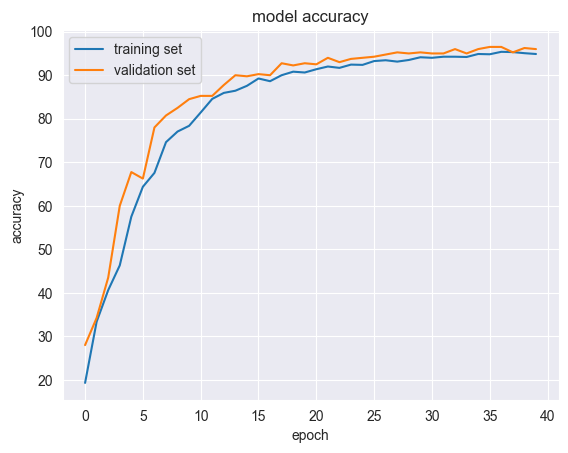

<Figure size 10000x10000 with 0 Axes>

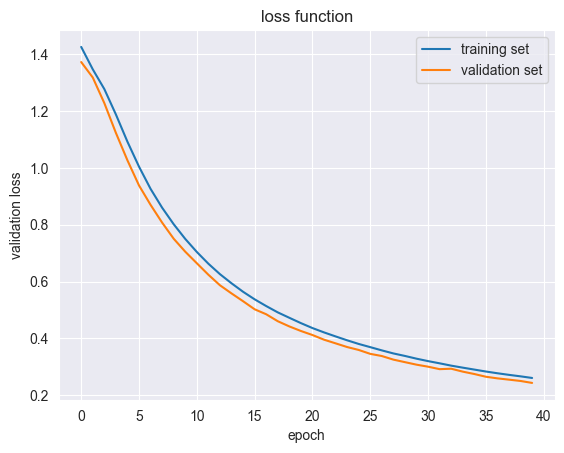

<Figure size 10000x10000 with 0 Axes>

In [108]:
LEARNING_RATE = 0.001
EPOCH = 40  
MINI_BATCH_SIZE = 10
VERBOSE = 1
NUMBER_OF_CLASSIFICATIONS = 4
ACTIVATION_FUNCTION = 'relu'

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

model = ClassificationMultiLayerPerceptron(
    LAYERS = [6, 18],
    EPOCH = EPOCH,
    MINI_BATCH_SIZE = MINI_BATCH_SIZE,
    VERBOSE = VERBOSE,
    NUMBER_OF_CLASSIFICATIONS = NUMBER_OF_CLASSIFICATIONS,
    ACTIVATION_FUNCTION = ACTIVATION_FUNCTION
)

model.get_summary()

model.compile(OPTIMIZER=adam_optimizer, LOSS_FUNCTION='sparse_categorical_crossentropy', METRICS = ['accuracy'])

model.fit(training=(x_train, y_train), testing=(x_test, y_test))

model.plot_history()


In [103]:
print(f"Probability {prob}")
print(f"Predictions {predict}")
print(f"Score {score}")

NameError: name 'prob' is not defined